In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [24]:
df = pd.read_csv("Churn_Modelling.csv")

In [25]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])

Total number of records/rows present in the dataset is: 10000
Total number of attributes/columns present in the dataset is: 14


In [27]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [29]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})


,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [30]:
#rename target variable and making data better structured with YES OR NO
df.rename(columns={"Exited":"Churned"},inplace=True)
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


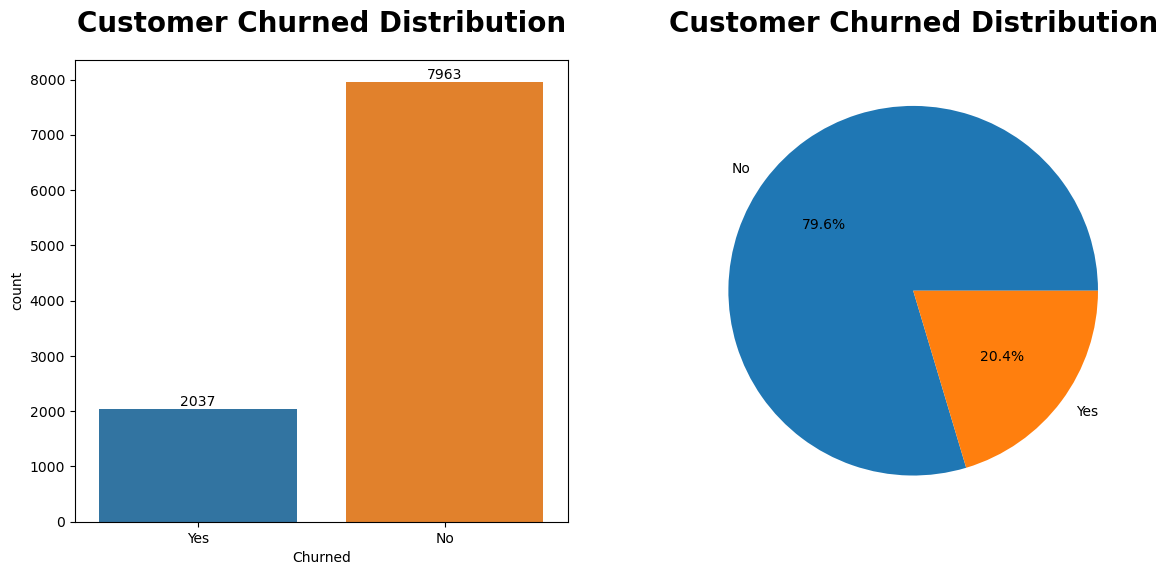

In [31]:
#seeing how many churn or not 
count = df["Churned"].value_counts()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x="Churned")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Customer Churned Distribution", fontweight="bold", size=20, pad=20)

plt.subplot(1, 2, 2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%")
plt.title("Customer Churned Distribution", fontweight="bold", size=20, pad=20)

plt.show()


In [32]:
#seeing how many churn or not based on GENDER 
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

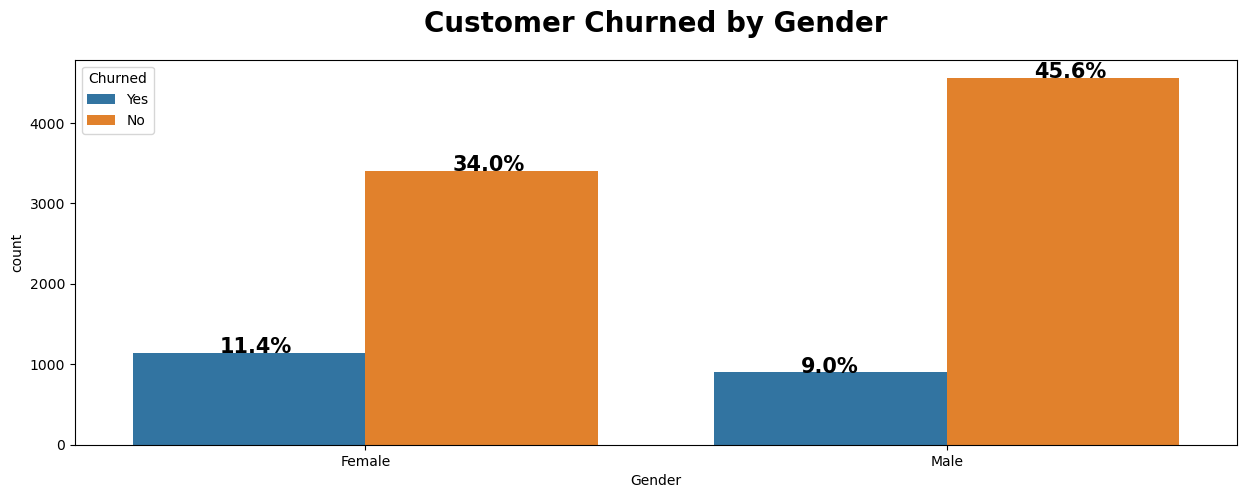

In [33]:
countplot("Gender")
# higher chance of female churning

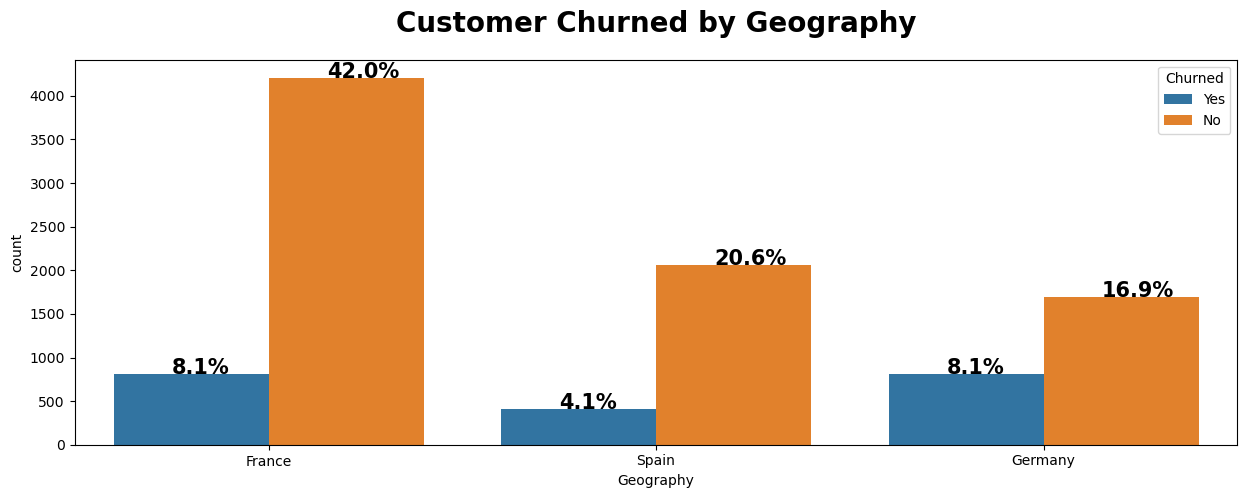

In [34]:
countplot("Geography")
#see how many churn based on LOCATION
#Churn rate is almost double in Germany compared to Spain despite roughly same percentage of customers

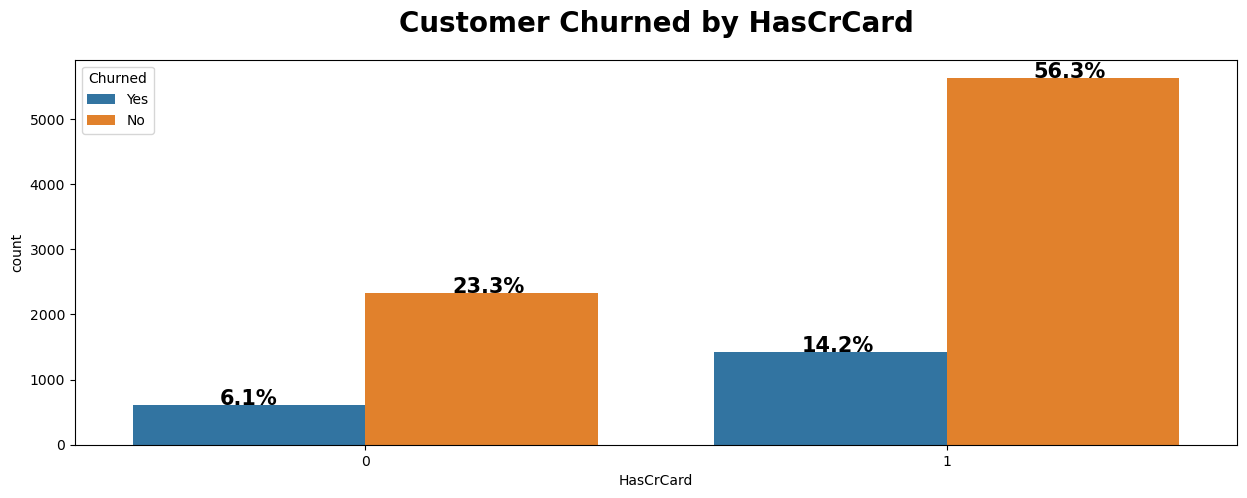

In [35]:
countplot("HasCrCard")
#see how many churn based on if they have a CREDIT CARD 
#nothing out of ordinary 

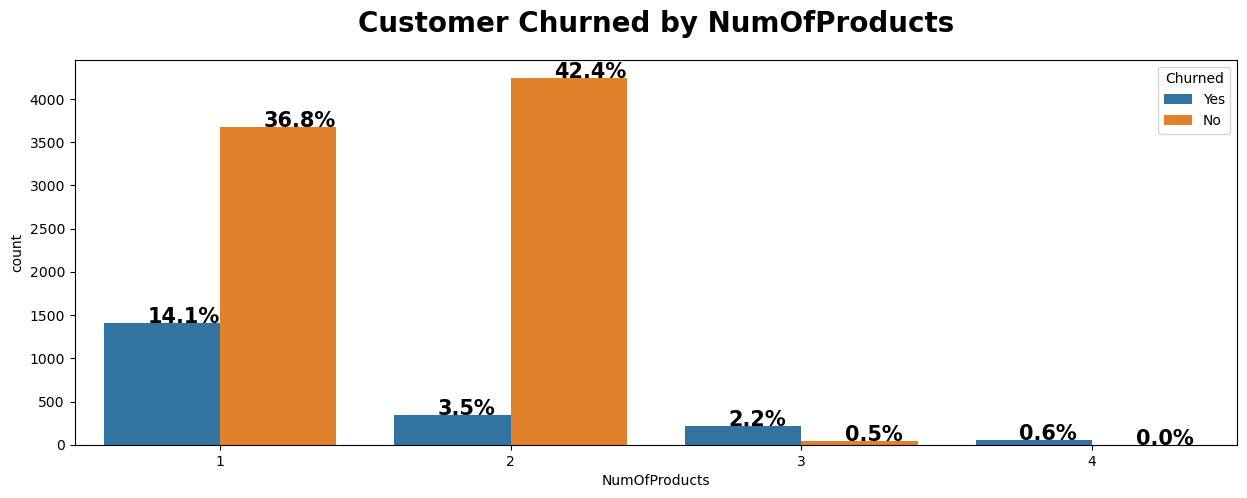

In [36]:
countplot("NumOfProducts")
#see churn rated based on how many PRODUCTS customer owns
#many churn if they only have 1 product or more than 2

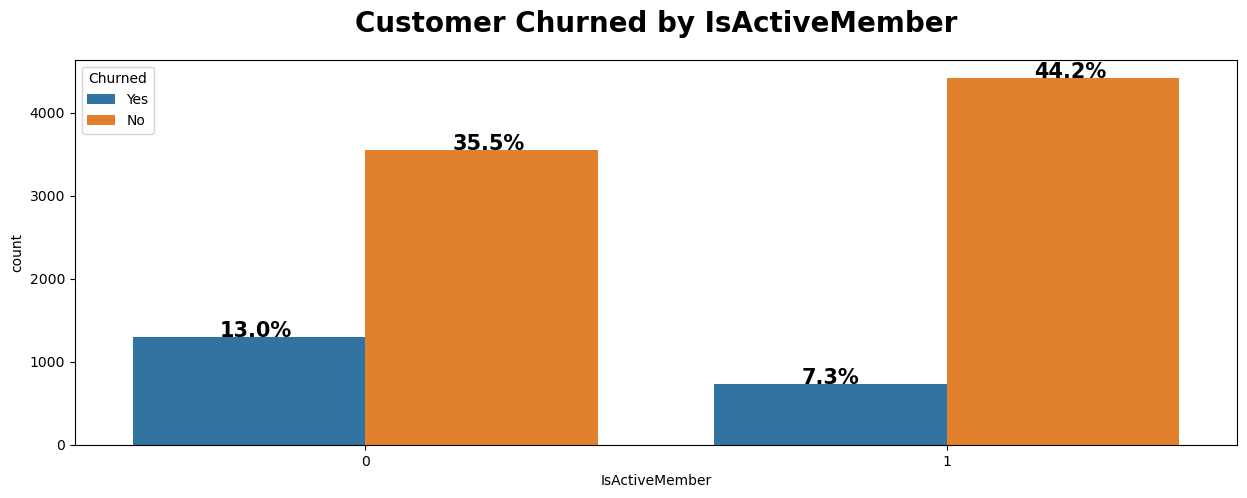

In [37]:
countplot("IsActiveMember")
#see churn rate based on ACTIVITY
#we see that people who are less active tend to churn more 

In [38]:
#train, test, split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Geography'] = label_encoder.fit_transform(df['Geography'])

# Split the data into features (X) and target variable (y)
X = df[['HasCrCard', 'Gender', 'Geography', 'NumOfProducts', 'IsActiveMember']]
y = df['Churned']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree classifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)


DecisionTreeClassifier()

In [39]:
# Predict the labels for the testing set
y_test_pred = dtree.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, pos_label='Yes')
recall = recall_score(y_test, y_test_pred, pos_label='Yes')
f1 = f1_score(y_test, y_test_pred, pos_label='Yes')

# Create a DataFrame to display the evaluation metrics
df_metrics = pd.DataFrame([[accuracy, precision, recall, f1]],
                          columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the evaluation metrics
print(df_metrics)

#Accuracy: The accuracy score measures the overall correctness of the model's predictions. 
#model correctly predicted the churned or not churned status of approximately 82.9% of the samples in the test set

#Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. 
# precision is 0.639344, indicating that out of all the samples the model predicted as churned, 
# approximately 63.9% of them were actually churned customers.

#Recall: Recall measures the ratio of true positive predictions to the total number of actual positive samples in the dataset. 
# recall of 0.29771 means that the model identified approximately 29.8% of the churned customers in the test set.

#F1 Score: Harmonic mean of precision and recall.
# F1 score is 0.40625, not that bad.

   Accuracy  Precision   Recall  F1 Score
0     0.829   0.639344  0.29771   0.40625


In [40]:
# CLASSIFICATION using RANDOM FORESTS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Geography'] = label_encoder.fit_transform(df['Geography'])

# Split the data into features (X) and target variable (y)
X = df[['HasCrCard', 'Gender', 'Geography', 'NumOfProducts', 'IsActiveMember']]
y = df['Churned']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Predict the labels for the test set
y_test_pred = rf.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, pos_label='Yes')
recall = recall_score(y_test, y_test_pred, pos_label='Yes')
f1 = f1_score(y_test, y_test_pred, pos_label='Yes')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.829
Precision: 0.639344262295082
Recall: 0.29770992366412213
F1 Score: 0.40625


In [41]:
#CLASSIFICATION USING NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Geography'] = label_encoder.fit_transform(df['Geography'])

# Split the data into features (X) and target variable (y)
X = df[['HasCrCard', 'Gender', 'Geography', 'NumOfProducts', 'IsActiveMember']]
y = df['Churned']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Naive Bayes classifier
nb = GaussianNB()
nb.fit(x_train, y_train)

# Predict the labels for the test set
y_test_pred = nb.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, pos_label='Yes')
recall = recall_score(y_test, y_test_pred, pos_label='Yes')
f1 = f1_score(y_test, y_test_pred, pos_label='Yes')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8205
Precision: 0.8148148148148148
Recall: 0.11195928753180662
F1 Score: 0.19686800894854586


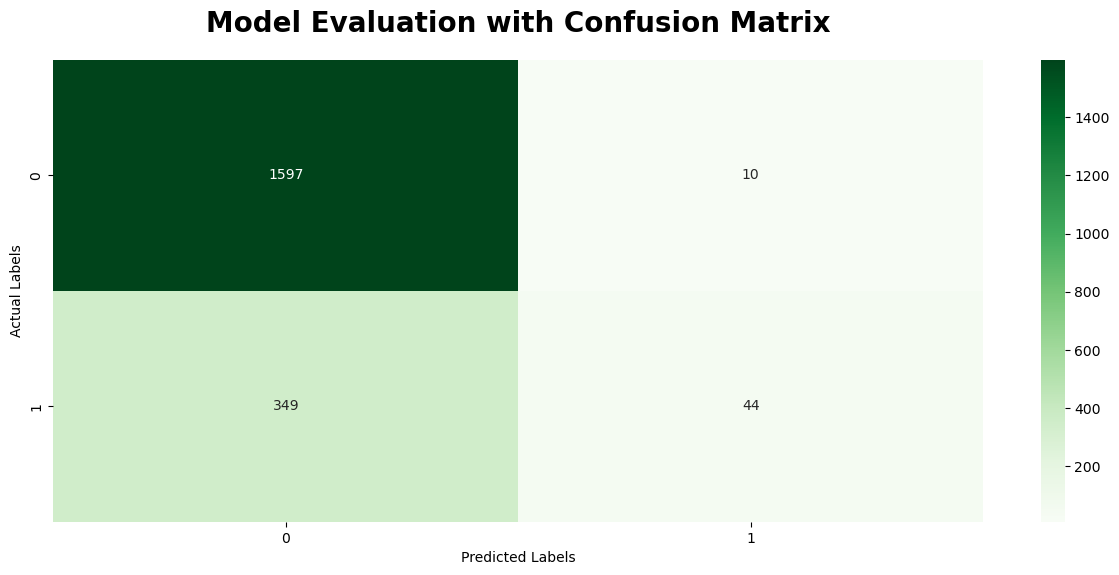

In [42]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, annot=True, cmap='Greens', fmt='g')
plt.title("Model Evaluation with Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

#The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. 
#It is effective in accurately classifying the desired outcome. 
#The presence of a relatively high number of false negatives shows the model missed some actual positive cases and needs improvemnt, maybe with more features

AUC: 0.7821221089033189


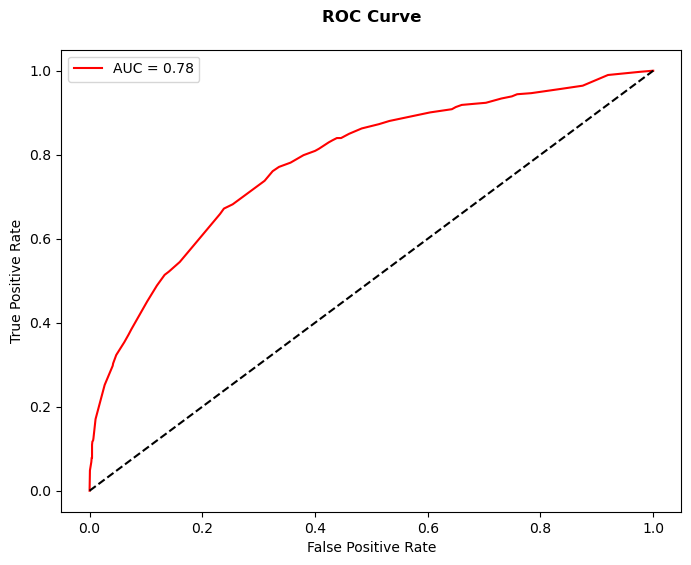

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode the 'No' and 'Yes' labels as {0, 1}
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Calculate predicted probabilities for the positive class
y_pred_proba = dtree.predict_proba(x_test)[:, 1]

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)

# Calculate the AUC
auc = roc_auc_score(y_test_encoded, y_pred_proba)
print("AUC:", auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color="red")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", pad=20, fontweight="bold")
plt.legend()
plt.show()

#An AUC (Area Under the Curve) value of 0.84 suggests the model has a high ability to 
# distinguish between positive and negative instances, indicating its effectiveness in making accurate predictions.

In [44]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create an SVM classifier
svm = SVC()

# Train the model
svm.fit(x_train, y_train_encoded)

# Make predictions on the test set
y_test_pred_encoded = svm.predict(x_test)

# Decode the predictions
y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, pos_label='Yes')
recall = recall_score(y_test, y_test_pred, pos_label='Yes')
f1 = f1_score(y_test, y_test_pred, pos_label='Yes')
confusion = confusion_matrix(y_test, y_test_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.8315
Precision: 0.6917808219178082
Recall: 0.25699745547073793
F1 Score: 0.3747680890538033
Confusion Matrix:
[[1562   45]
 [ 292  101]]
